In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('/fuel consumption2 (1).xlsx')

In [4]:
print(df.shape)

(388, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [6]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [7]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [8]:
df.drop(['specials','refill liters','refill gas'],axis=1,inplace=True)

In [9]:
df.head(2)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0


In [10]:
mn = df.temp_inside.mean()
mn

21.929521276595743

In [11]:
med = df.temp_inside.median()
med

22.0

In [12]:
df['temp_inside']=df.temp_inside.fillna(mn)

In [13]:
df.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [14]:
df.head(5)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [15]:
df[['distance','consume','speed','temp_inside','temp_outside']].mean()

distance        19.652835
consume          4.912371
speed           41.927835
temp_inside     21.929521
temp_outside    11.358247
dtype: float64

In [16]:
df[['distance','consume','speed','temp_inside','temp_outside']].median()

distance        14.6
consume          4.7
speed           40.5
temp_inside     22.0
temp_outside    10.0
dtype: float64

In [17]:
df[['gas_type','AC','rain','sun']].mode()

,gas_type,AC,rain,sun
0,SP98,0,0,0


In [18]:
df.describe()
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


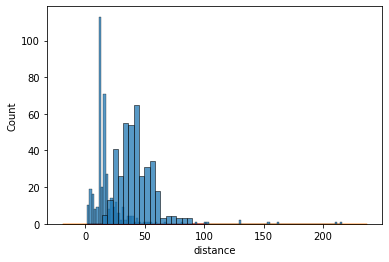

In [19]:
sns.histplot(df.distance)
sns.kdeplot(df.distance,shade=True)
sns.histplot(df.speed)
sns.kdeplot(df.speed,shade=True)

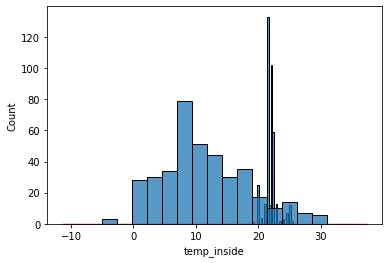

In [20]:
sns.histplot(df.temp_inside)
sns.kdeplot(df.temp_inside,shade=True)
sns.histplot(df.temp_outside)
sns.kdeplot(df.temp_outside,shade=True)

In [21]:
df.head(1)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0


(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 228.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

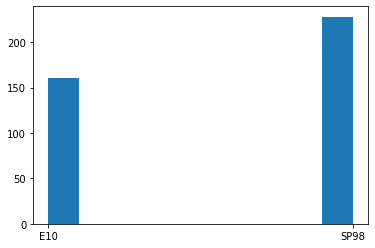

In [22]:
plt.hist(df.gas_type)

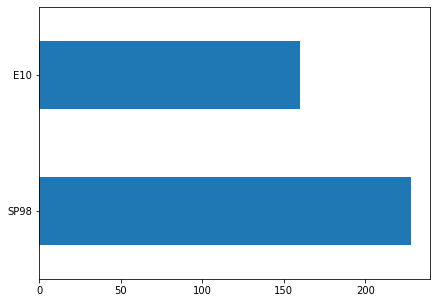

In [23]:
plt.figure(figsize=(7,5))
df.gas_type.value_counts().plot(kind='barh')

(array([  3.,  28.,  43., 100.,  68.,  57.,  43.,  19.,  19.,   8.]),
 array([-5. , -1.4,  2.2,  5.8,  9.4, 13. , 16.6, 20.2, 23.8, 27.4, 31. ]),
 <a list of 10 Patch objects>)

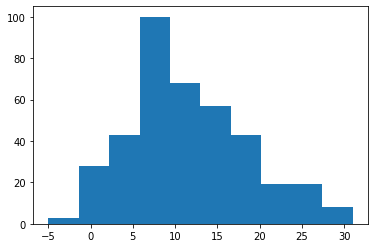

In [24]:
plt.hist(df.temp_outside)

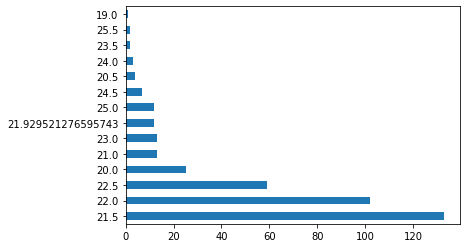

In [25]:
df.temp_inside.value_counts().plot(kind='barh')

(array([  1.,  25.,   4., 146., 114.,  59.,  15.,   3.,   7.,  14.]),
 array([19.  , 19.65, 20.3 , 20.95, 21.6 , 22.25, 22.9 , 23.55, 24.2 ,
        24.85, 25.5 ]),
 <a list of 10 Patch objects>)

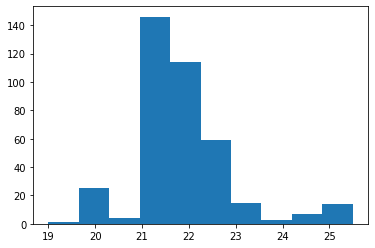

In [26]:
plt.hist(df.temp_inside)

In [27]:
df.head(2)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0


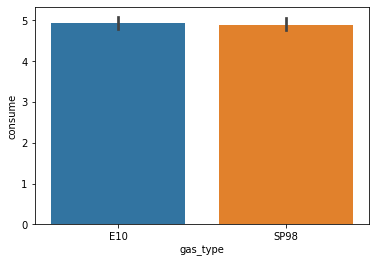

In [28]:
sns.barplot(x='gas_type',y='consume',data=df)

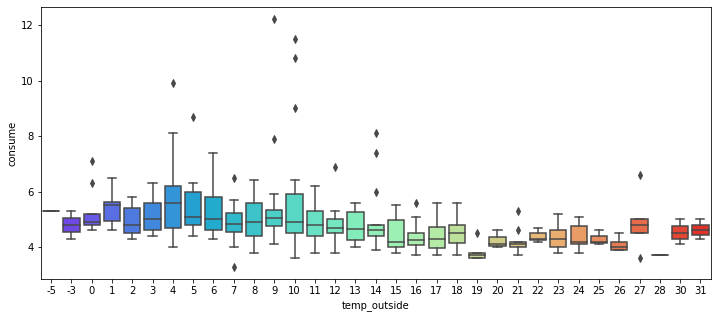

In [29]:
plt.figure(figsize=(12,5))
sns.boxplot(x='temp_outside',y='consume',data=df,palette='rainbow')

In [30]:
df.head(2)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0


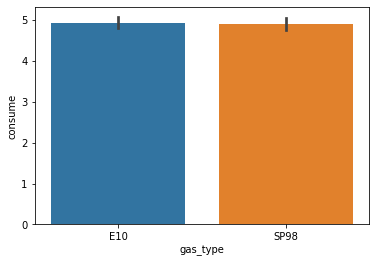

In [31]:
sns.barplot(x='gas_type',y='consume',data=df)

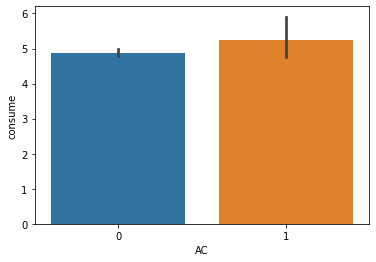

In [32]:
sns.barplot(x='AC',y='consume',data=df)

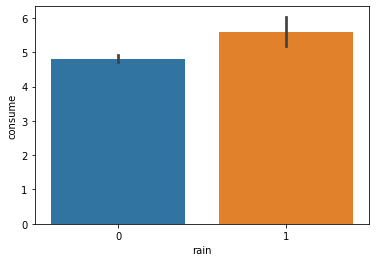

In [33]:
sns.barplot(x='rain',y='consume',data=df)

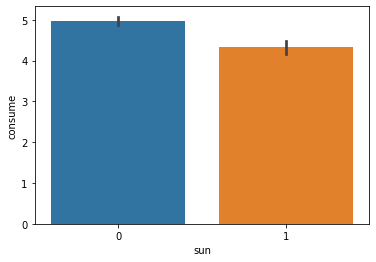

In [34]:
sns.barplot(x='sun',y='consume',data=df)

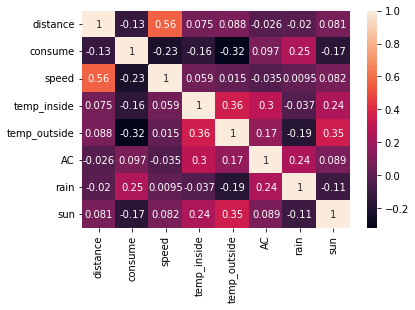

In [35]:
sns.heatmap(df.corr(),annot=True)

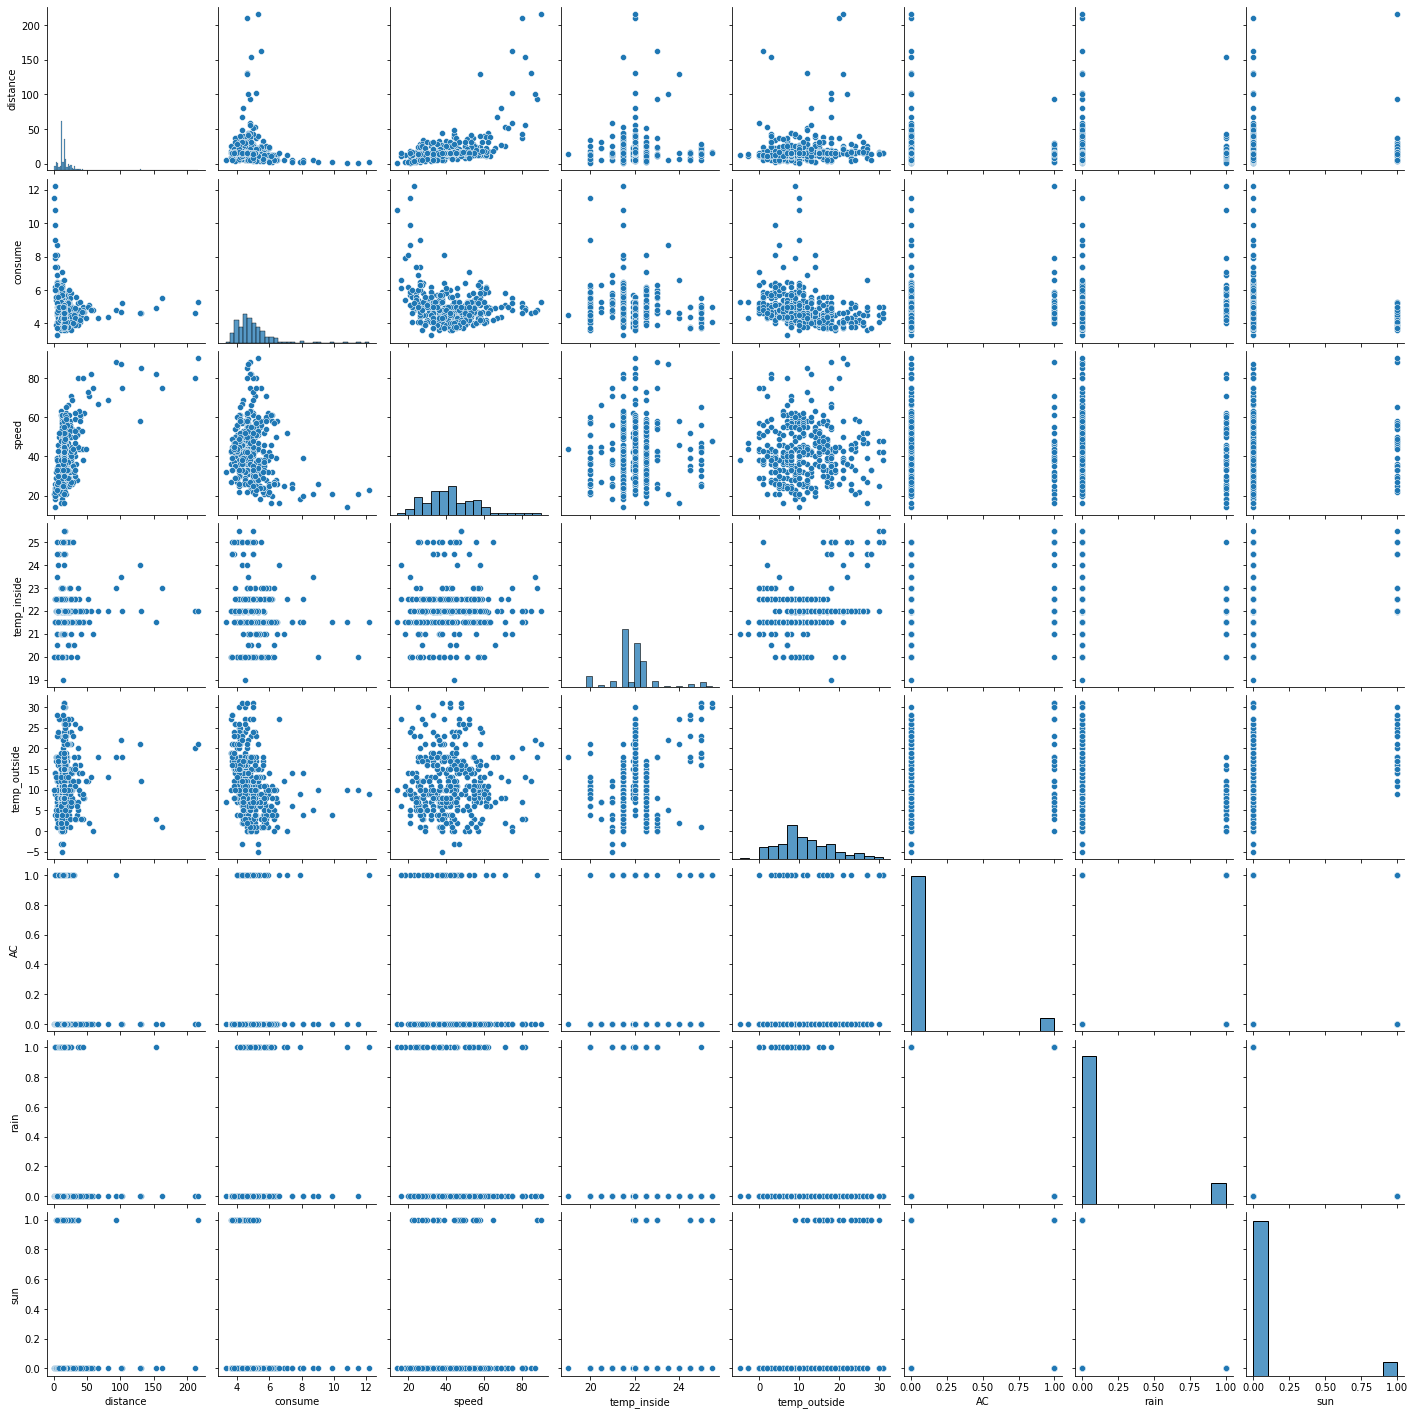

In [36]:
sns.pairplot(df)

In [37]:
df.head(2)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0


In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
df['gas_types']=le.fit_transform(df.gas_type)
df.drop('gas_type',axis=1,inplace=True)

In [40]:
df.head(2)

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_types
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0


In [41]:
x=df.drop(['consume'],axis=1)
y=df.consume

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred=linear_reg.predict(x_test)

In [46]:
mean_absolute_error(y_test,y_pred)

0.6689496242764851

In [47]:
mean_squared_error(y_test,y_pred)

0.7476946880297477

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.8646934069540184

In [49]:
import pickle

In [50]:
pickle.dump(linear_reg,open('model.pkl','wb'))

In [51]:
import joblib
joblib.dump(linear_reg,'model.save')

['model.save']

In [52]:
y

0      5.0
1      4.2
2      5.5
3      3.9
4      4.5
      ... 
383    3.7
384    4.3
385    3.8
386    4.6
387    5.0
Name: consume, Length: 388, dtype: float64

In [53]:
x

,distance,speed,temp_inside,temp_outside,AC,rain,sun,gas_types
0,28.0,26,21.5,12,0,0,0,0
1,12.0,30,21.5,13,0,0,0,0
2,11.2,38,21.5,15,0,0,0,0
3,12.9,36,21.5,14,0,0,0,0
4,18.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,39,24.5,18,0,0,0,1
384,16.1,38,25.0,31,1,0,0,1
385,16.0,45,25.0,19,0,0,0,1
386,15.4,42,25.0,31,1,0,0,1
